In [2]:
#import modules
import numpy as np
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

try:
  from empiricaldist import Pmf
except:
  !pip install empiricaldist



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=89a9297ffc9ff0f540edeb3766006bbbdfa28bc1ea11a1fb918c4b6e20c33f86
  Stored in directory: /root/.cache/pip/wheels/dd/dc/1c/c472efa84814edbb5b67d132ad3950534d0d7fd808543a659c
Successfully built empiricaldist


# **Exercises**

##### _Exercise 4-1_
In Major League Baseball(MLB), most players have a batting average between .200 and .330, which their probability of getting a hit is between 0.2 and 0.33.

Suppose a player appearing in thier first game gets 3 hits out of 3 attempts. What is the posterior distribution for their probability of getting a hit? 

* Probability of a hit is $p$ and the batter gets $n$ strikes. The probability that we get a total of $k$ hits is given by **binomial distribution** 
\begin{equation}
{n\choose k}p^k(1-p)^{n-k} 
\end{equation}

for any value of $k$ from 0 to $n$, including both. ( Term ${n\choose k}$ means $n$ choose $k$)

For Example, if we have $n=3$ hits and the prob of hitting the ball everytime is $p=0.5$, here's the probabilty of getting $k=3$ hits:

In [3]:
n=3
p=0.5
k=3
binom.pmf(k, n, p)

0.12500000000000003

In [4]:
ks = np.arange(n)
ps=binom.pmf(ks, n, p)
ps

array([0.125, 0.375, 0.375])

In [5]:
from empiricaldist import Pmf 
pmf_k = Pmf(ps,ks)
pmf_k

,probs
0,0.125
1,0.375
2,0.375


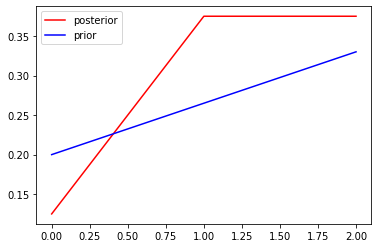

In [6]:
hypothesis= np.linspace(0.20,0.33, 3)
prior=Pmf(hypothesis,[0,1,2])
plt.plot(pmf_k,color='red')
plt.plot(prior,color='blue')
plt.legend(["posterior","prior"])

In [7]:
prior

,probs
0,0.200
1,0.265
2,0.330


### *Exercise 4-2*


Exercise: Whenever you survey people about sensitive issues, you have to deal with social desirability bias, which is the tendency of people to adjust their answers to show themselves in the most positive light. One way to improve the accuracy of the results is randomized response.

As an example, suppose you want to know how many people cheat on their taxes. If you ask them directly, it is likely that some of the cheaters will lie. You can get a more accurate estimate if you ask them indirectly, like this: Ask each person to flip a coin and, without revealing the outcome,

* If they get heads, they report YES.

* If they get tails, they honestly answer the question "Do you cheat on your taxes?"

If someone says YES, we don't know whether they actually cheat on their taxes; they might have flipped heads. Knowing this, people might be more willing to answer honestly.

Suppose you survey 100 people this way and get 80 YESes and 20 NOs. Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes? What is the most likely quantity in the posterior distribution?

In [8]:
hypos= np.linspace(0,1,101)
prior = Pmf(1,hypos)
prior

,probs
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1
...,...
0.96,1
0.97,1
0.98,1
0.99,1


In [9]:
likelihood_heads = hypos
likelihood_tails = 1- hypos

In [10]:
likelihood ={
    'H': likelihood_heads, #"YES"
    'T': likelihood_tails  # "NO"
}

In [11]:
dataset='H'*80 + 'T'*20

In [12]:
def update_response(pmf,dataset):
  for data in dataset:
    pmf *= likelihood[data]
  pmf.normalize()

In [13]:
posterior = prior.copy()
update_response(posterior,dataset)
posterior

,probs
0.00,0.000000e+00
0.01,4.427684e-140
0.02,4.369119e-116
0.03,4.351187e-102
0.04,3.497008e-92
...,...
0.96,2.271806e-09
0.97,1.650580e-11
0.98,1.127609e-14
0.99,2.422637e-20


In [14]:
def convert_pmf_df(pmf):
  results=pd.DataFrame(columns=['probs'])
  results['probs']=pmf
  return results

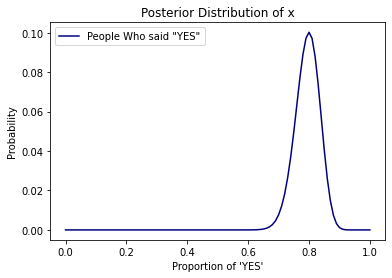

In [15]:
plt.title("Posterior Distribution of x")
plt.ylabel("Probability")
plt.xlabel("Proportion of 'YES'")
plt.plot(convert_pmf_df(posterior), color='navy')
plt.legend(['People Who said "YES"'])
plt.show()

The posterior distribution suggests that the about 0.7 to 0.9 of the people probably had the coin toss outcome as heads.

The most likely quantity is 0.8

**Exercise 4-3**


Suppose you want to test whether a coin is fair, but you don't want to spin it hundreds of times. So you make a machine that spins the coin automatically and uses computer vision to determine the outcome.

However, you discover that the machine is not always accurate. Specifically, suppose the probability is `y=0.2` that an actual heads is reported as tails, or actual tails reported as heads.

If we spin a coin `250` times and the machine reports `140` heads, what is the posterior distribution of` x`? What happens as you vary the value of y?

In [16]:
y=0.2
likelihood_heads43 = hypos
likelihood_tails43 = 1- hypos

In [17]:
likelihood ={
    'H': likelihood_heads43,
    'T': likelihood_tails43
}

In [18]:
dataset43= 'H'*(140 - int(140*y) + int(110*y) ) + 'T'*(110- int(110*y) + int(140*y)) # Since the problem statement had these outcomes
len(dataset43)

250

In [19]:
posterior43=prior.copy()
update_response(posterior43,dataset43)
posterior43

,probs
0.00,0.000000e+00
0.01,3.739815e-195
0.02,2.508486e-155
0.03,3.012568e-132
0.04,4.996540e-116
...,...
0.96,3.487159e-91
0.97,4.494128e-105
0.98,6.651830e-125
0.99,3.120927e-159


In [20]:
posterior43.max_prob()

0.54

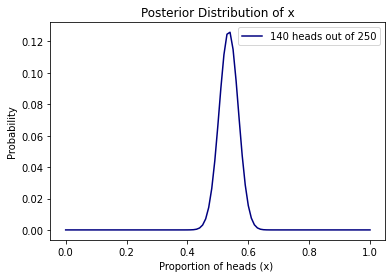

In [21]:
plt.title("Posterior Distribution of x")
plt.ylabel("Probability")
plt.xlabel("Proportion of heads (x) ")
plt.plot(convert_pmf_df(posterior43), color='navy')
plt.legend(['140 heads out of 250'])
plt.show()

The posterior distribution of $x$ = 0.54 , while $y=0.2$

So, when we change `y`, the max probability changes. The relation between x and y, $ x ∝ \frac {1}y $

### *Exercise 4-4*


In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders. Of course, some missile designs are better than others; let's assume that each design has some probability of hitting an alien ship, x.

Based on previous tests, the distribution of $x$ in the population of designs is approximately uniform between 0.1 and 0.4.

Now suppose the new ultra-secret **Alien Blaster 9000** is being tested. In a press conference, an EDL general reports that the new design has been tested twice, taking **two shots** during each test. The results of the test are confidential, so the general won't say how many targets were hit, but they report: "The same number of targets were hit in the two tests, so we have reason to think this new design is consistent."

Is this data good or bad? That is, does it increase or decrease your estimate of $x$ for the **Alien Blaster 9000**?

Hint: If the probability of hitting each target is  $x$ , the probability of hitting one target in both tests is  $[2x(1−x)]2$ .

In [135]:
x = np.linspace(0.1,0.4,100) # we have 100 targets
prior44 = Pmf(1,x)
prior44

,probs
0.100000,1
0.103030,1
0.106061,1
0.109091,1
0.112121,1
...,...
0.387879,1
0.390909,1
0.393939,1
0.396970,1


In [136]:
likelihood1 = {
    'H': x,
    'M': 1-x
}

Here The result Hypotheses could be:

$H \text{= Hits}$

$M \text{= Miss}$

`Test-1:`

H is a constant

`Test-2:`

H is a constant 

Nonetheless, $H$ would always be the same regardless of the outcome of the two tests. However if in both cases one of the arguments from 1,2 from each test ought to be True. So naturally we can say that either both targets were hit during both tests, or one was hit and the other was missed. Despite the omission of information in the premises presented, it is our job to conclude how hits and misses altogether affect the data based on the prior distribution which we deemed uniform between threshold $0.1 \to 0.4.$ 

In [144]:
test1_1= 'H'*50+ 'M'*100 # Where hit in contrast more than   
test2_2= 'H'*50 + 'M'*51

In [145]:
#probability of hitting one target:
def update_44(pmf,dataset):
  for data in dataset:
    pmf *= likelihood1[data]
  pmf.normalize()

In [146]:
posterior44=prior44.copy()
update_44(posterior44,test1_1)
posterior44

,probs
0.100000,2.562048e-15
0.103030,8.135088e-15
0.106061,2.470866e-14
0.109091,7.196203e-14
0.112121,2.014158e-13
...,...
0.387879,1.267304e-02
0.390909,1.138509e-02
0.393939,1.017214e-02
0.396970,9.038945e-03


In [147]:
test_2=posterior44.copy()
update_44(test_2,test2_2)
test_2

,probs
0.100000,1.778131e-35
0.103030,2.114881e-34
0.106061,2.302898e-33
0.109091,2.306974e-32
0.112121,2.135644e-31
...,...
0.387879,6.940641e-02
0.390909,7.143672e-02
0.393939,7.281325e-02
0.396970,7.350044e-02


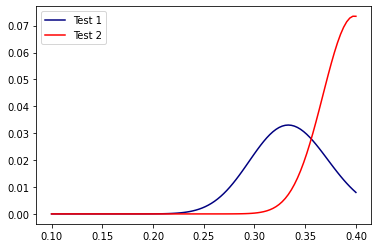

In [148]:
plt.plot(posterior44,color='navy')
plt.plot(test_2,color='red')
plt.legend(["Test 1", "Test 2"])

In [142]:
posterior44.max_prob()

0.33333333333333337

In [143]:
test_2.max_prob()

0.4